In [210]:
# Calculate Bitcoin's beta to US market proxy
import pandas as pd

# read daily BTC/S&P 500 data
btc = pd.read_csv('btc.csv', parse_dates=['caldt'], thousands=',')
snp500 = pd.read_csv('snp500.csv', parse_dates=['caldt'], thousands=',')

# read risk-free rate data
FF_daily = pd.read_csv('FF_daily.csv', parse_dates=['caldt'])

In [211]:
days = btc.caldt[btc.caldt.isin(snp500.caldt)]
days = days.reset_index(drop=True)

In [212]:
data = btc[btc.caldt.isin(days)]
data = data.rename(columns={'close':'btc_close', 'ret':'btc_ret'})
data = data.merge(snp500, how='inner', on='caldt')
data = data.rename(columns={'close':'snp_close', 'ret':'snp_ret'})
data = data.merge(FF_daily, how = 'left', on='caldt')
data['rf'] = data['rf'].fillna(0)
data = data.sort_values(by='caldt')
data = data.reset_index(drop=True)
data

,caldt,btc_close,btc_ret,snp_close,snp_ret,rf
0,2010-07-19,0.1,0.0000,1071.25,0.0060,0.001
1,2010-07-20,0.1,0.0000,1083.48,0.0114,0.001
2,2010-07-21,0.1,0.0000,1069.59,-0.0128,0.001
3,2010-07-22,0.1,0.0000,1093.67,0.0225,0.001
4,2010-07-23,0.1,0.0000,1102.66,0.0082,0.001
...,...,...,...,...,...,...
2691,2021-03-26,55036.1,0.0724,3974.54,0.0166,0.000
2692,2021-03-29,57616.2,0.0332,3971.09,-0.0009,0.000
2693,2021-03-30,58771.3,0.0200,3958.55,-0.0032,0.000
2694,2021-03-31,58763.7,-0.0001,3972.89,0.0036,0.000


In [213]:
data['btc_exret'] = data['btc_ret'] - data['rf']
data['snp_exret'] = data['snp_ret'] - data['rf']
data.set_index('caldt', inplace=True)
data

,btc_close,btc_ret,snp_close,snp_ret,rf,btc_exret,snp_exret
caldt,,,,,,,
2010-07-19,0.1,0.0000,1071.25,0.0060,0.001,-0.0010,0.0050
2010-07-20,0.1,0.0000,1083.48,0.0114,0.001,-0.0010,0.0104
2010-07-21,0.1,0.0000,1069.59,-0.0128,0.001,-0.0010,-0.0138
2010-07-22,0.1,0.0000,1093.67,0.0225,0.001,-0.0010,0.0215
2010-07-23,0.1,0.0000,1102.66,0.0082,0.001,-0.0010,0.0072
...,...,...,...,...,...,...,...
2021-03-26,55036.1,0.0724,3974.54,0.0166,0.000,0.0724,0.0166
2021-03-29,57616.2,0.0332,3971.09,-0.0009,0.000,0.0332,-0.0009
2021-03-30,58771.3,0.0200,3958.55,-0.0032,0.000,0.0200,-0.0032


In [214]:
import finance_byu.rolling as rolling

data['beta'] = rolling.roll_beta(data['btc_exret'], data['snp_exret'], 250, 250)
data

,btc_close,btc_ret,snp_close,snp_ret,rf,btc_exret,snp_exret,beta
caldt,,,,,,,,
2010-07-19,0.1,0.0000,1071.25,0.0060,0.001,-0.0010,0.0050,NaN
2010-07-20,0.1,0.0000,1083.48,0.0114,0.001,-0.0010,0.0104,NaN
2010-07-21,0.1,0.0000,1069.59,-0.0128,0.001,-0.0010,-0.0138,NaN
2010-07-22,0.1,0.0000,1093.67,0.0225,0.001,-0.0010,0.0215,NaN
2010-07-23,0.1,0.0000,1102.66,0.0082,0.001,-0.0010,0.0072,NaN
...,...,...,...,...,...,...,...,...
2021-03-26,55036.1,0.0724,3974.54,0.0166,0.000,0.0724,0.0166,0.873247
2021-03-29,57616.2,0.0332,3971.09,-0.0009,0.000,0.0332,-0.0009,0.876802
2021-03-30,58771.3,0.0200,3958.55,-0.0032,0.000,0.0200,-0.0032,0.946984


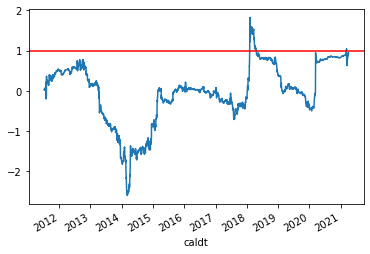

In [215]:
import matplotlib.pyplot as plt

ax = data.beta.plot()
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

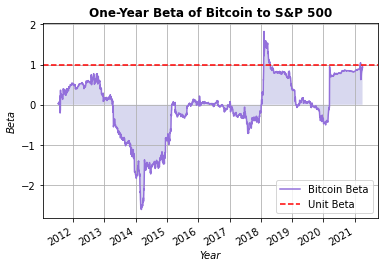

In [374]:
# Fancify above graph

ax = data.beta.plot(color="mediumpurple")
plt.axhline(y=1, color='r', linestyle='dashed')
ax.set_xlabel('Year')
ax.set_ylabel('Beta')
ax.set_title('One-Year Beta of Bitcoin to S&P 500')
ax.grid('on')

l = ax.fill_between(data.index, data.beta)
l.set_facecolors([[.5,.5,.8,.3]])

# tweak the axis labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()

xlab.set_style('italic')
xlab.set_size(10)
ylab.set_style('italic')
ylab.set_size(10)

# tweak the title
ttl = ax.title
ttl.set_weight('bold')

plt.legend(["Bitcoin Beta", "Unit Beta"], loc="lower right")
plt.savefig('beta_snp.png')

In [216]:
data['btc_sigma'] = data.btc_ret.rolling(window=250).std()
data['snp_sigma'] = data.snp_ret.rolling(window=250).std()
data

,btc_close,btc_ret,snp_close,snp_ret,rf,btc_exret,snp_exret,beta,btc_sigma,snp_sigma
caldt,,,,,,,,,,
2010-07-19,0.1,0.0000,1071.25,0.0060,0.001,-0.0010,0.0050,NaN,NaN,NaN
2010-07-20,0.1,0.0000,1083.48,0.0114,0.001,-0.0010,0.0104,NaN,NaN,NaN
2010-07-21,0.1,0.0000,1069.59,-0.0128,0.001,-0.0010,-0.0138,NaN,NaN,NaN
2010-07-22,0.1,0.0000,1093.67,0.0225,0.001,-0.0010,0.0215,NaN,NaN,NaN
2010-07-23,0.1,0.0000,1102.66,0.0082,0.001,-0.0010,0.0072,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-03-26,55036.1,0.0724,3974.54,0.0166,0.000,0.0724,0.0166,0.873247,0.039009,0.013472
2021-03-29,57616.2,0.0332,3971.09,-0.0009,0.000,0.0332,-0.0009,0.876802,0.039040,0.013426
2021-03-30,58771.3,0.0200,3958.55,-0.0032,0.000,0.0200,-0.0032,0.946984,0.039010,0.013110


In [217]:
data['correlation'] = (data['beta']*data['snp_sigma']) / data['btc_sigma']
data

,btc_close,btc_ret,snp_close,snp_ret,rf,btc_exret,snp_exret,beta,btc_sigma,snp_sigma,correlation
caldt,,,,,,,,,,,
2010-07-19,0.1,0.0000,1071.25,0.0060,0.001,-0.0010,0.0050,NaN,NaN,NaN,NaN
2010-07-20,0.1,0.0000,1083.48,0.0114,0.001,-0.0010,0.0104,NaN,NaN,NaN,NaN
2010-07-21,0.1,0.0000,1069.59,-0.0128,0.001,-0.0010,-0.0138,NaN,NaN,NaN,NaN
2010-07-22,0.1,0.0000,1093.67,0.0225,0.001,-0.0010,0.0215,NaN,NaN,NaN,NaN
2010-07-23,0.1,0.0000,1102.66,0.0082,0.001,-0.0010,0.0072,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,55036.1,0.0724,3974.54,0.0166,0.000,0.0724,0.0166,0.873247,0.039009,0.013472,0.301586
2021-03-29,57616.2,0.0332,3971.09,-0.0009,0.000,0.0332,-0.0009,0.876802,0.039040,0.013426,0.301543
2021-03-30,58771.3,0.0200,3958.55,-0.0032,0.000,0.0200,-0.0032,0.946984,0.039010,0.013110,0.318255


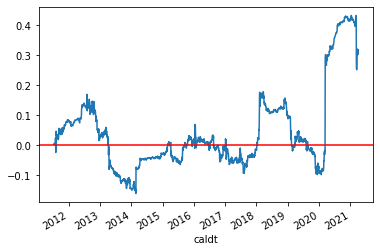

In [218]:
data.correlation.plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

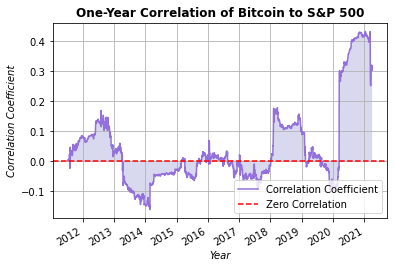

In [378]:
# Fancify above graph

ax = data.correlation.plot(color="mediumpurple")
plt.axhline(y=0, color='r', linestyle='dashed')
ax.set_xlabel('Year')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('One-Year Correlation of Bitcoin to S&P 500')
ax.grid('on')

l = ax.fill_between(data.index, data.correlation)
l.set_facecolors([[.5,.5,.8,.3]])

# tweak the axis labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()

xlab.set_style('italic')
xlab.set_size(10)
ylab.set_style('italic')
ylab.set_size(10)

# tweak the title
ttl = ax.title
ttl.set_weight('bold')

plt.legend(["Correlation Coefficient", "Zero Correlation"], loc="lower right")
plt.savefig('correlation.png')

In [225]:
# Calculate bitcoin's beta to World market proxy

world = pd.read_csv('MSCIWorld.csv', parse_dates=['caldt'], thousands=',')

In [226]:
world_days = btc.caldt[btc.caldt.isin(world.caldt)]
world_days = world_days.reset_index(drop=True)

In [227]:
world_data = btc[btc.caldt.isin(world_days)]
world_data = world_data.rename(columns={'close':'btc_close', 'ret':'btc_ret'})
world_data = world_data.merge(world, how='inner', on='caldt')
world_data = world_data.rename(columns={'close':'world_close', 'ret':'world_ret'})
world_data = world_data.merge(FF_daily, how = 'left', on='caldt')
world_data['rf'] = world_data['rf'].fillna(0)
world_data = world_data.sort_values(by='caldt')
world_data = world_data.reset_index(drop=True)
world_data

,caldt,btc_close,btc_ret,world_close,world_ret,rf
0,2012-07-09,7.0,0.0324,1224.14,-0.0043,0.0
1,2012-07-10,7.2,0.0256,1218.81,-0.0044,0.0
2,2012-07-11,7.2,0.0000,1218.81,0.0000,0.0
3,2012-07-12,7.8,0.0853,1207.47,-0.0093,0.0
4,2012-07-13,7.7,-0.0116,1225.55,0.0150,0.0
...,...,...,...,...,...,...
2274,2021-03-29,57616.2,0.0332,2811.53,-0.0012,0.0
2275,2021-03-30,58771.3,0.0200,2805.10,-0.0023,0.0
2276,2021-03-31,58763.7,-0.0001,2811.70,0.0024,0.0
2277,2021-04-01,58718.3,-0.0008,2840.19,0.0101,0.0


In [228]:
world_data['btc_exret'] = world_data['btc_ret'] - world_data['rf']
world_data['world_exret'] = world_data['world_ret'] - world_data['rf']
world_data.set_index('caldt', inplace=True)
world_data

,btc_close,btc_ret,world_close,world_ret,rf,btc_exret,world_exret
caldt,,,,,,,
2012-07-09,7.0,0.0324,1224.14,-0.0043,0.0,0.0324,-0.0043
2012-07-10,7.2,0.0256,1218.81,-0.0044,0.0,0.0256,-0.0044
2012-07-11,7.2,0.0000,1218.81,0.0000,0.0,0.0000,0.0000
2012-07-12,7.8,0.0853,1207.47,-0.0093,0.0,0.0853,-0.0093
2012-07-13,7.7,-0.0116,1225.55,0.0150,0.0,-0.0116,0.0150
...,...,...,...,...,...,...,...
2021-03-29,57616.2,0.0332,2811.53,-0.0012,0.0,0.0332,-0.0012
2021-03-30,58771.3,0.0200,2805.10,-0.0023,0.0,0.0200,-0.0023
2021-03-31,58763.7,-0.0001,2811.70,0.0024,0.0,-0.0001,0.0024


In [230]:
world_data['beta'] = rolling.roll_beta(world_data['btc_exret'], world_data['world_exret'], 250, 250)
world_data

,btc_close,btc_ret,world_close,world_ret,rf,btc_exret,world_exret,beta
caldt,,,,,,,,
2012-07-09,7.0,0.0324,1224.14,-0.0043,0.0,0.0324,-0.0043,NaN
2012-07-10,7.2,0.0256,1218.81,-0.0044,0.0,0.0256,-0.0044,NaN
2012-07-11,7.2,0.0000,1218.81,0.0000,0.0,0.0000,0.0000,NaN
2012-07-12,7.8,0.0853,1207.47,-0.0093,0.0,0.0853,-0.0093,NaN
2012-07-13,7.7,-0.0116,1225.55,0.0150,0.0,-0.0116,0.0150,NaN
...,...,...,...,...,...,...,...,...
2021-03-29,57616.2,0.0332,2811.53,-0.0012,0.0,0.0332,-0.0012,1.141684
2021-03-30,58771.3,0.0200,2805.10,-0.0023,0.0,0.0200,-0.0023,1.170883
2021-03-31,58763.7,-0.0001,2811.70,0.0024,0.0,-0.0001,0.0024,1.159279


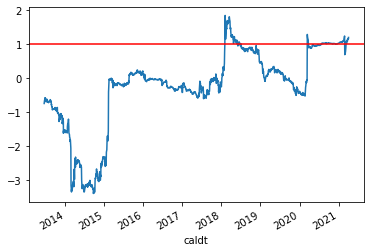

In [231]:
ax = world_data.beta.plot()
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

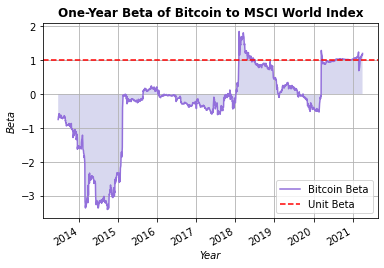

In [373]:
# Fancify above graph

ax = world_data.beta.plot(color="mediumpurple")
plt.axhline(y=1, color='r', linestyle='dashed')
ax.set_xlabel('Year')
ax.set_ylabel('Beta')
ax.set_title('One-Year Beta of Bitcoin to MSCI World Index')
ax.grid('on')

l = ax.fill_between(world_data.index, world_data.beta)
l.set_facecolors([[.5,.5,.8,.3]])

# tweak the axis labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()

xlab.set_style('italic')
xlab.set_size(10)
ylab.set_style('italic')
ylab.set_size(10)

# tweak the title
ttl = ax.title
ttl.set_weight('bold')

plt.legend(["Bitcoin Beta", "Unit Beta"], loc="lower right")
plt.savefig('beta_world.png')

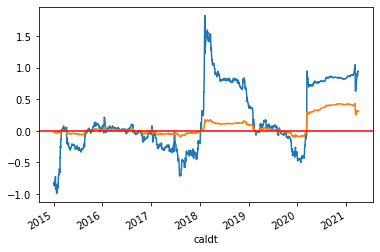

In [236]:
ax = data.beta[data.index >= '2015-01-01'].plot()
data.correlation[data.index >= '2015-01-01'].plot()
plt.axhline(y=0, color='r', linestyle='-')

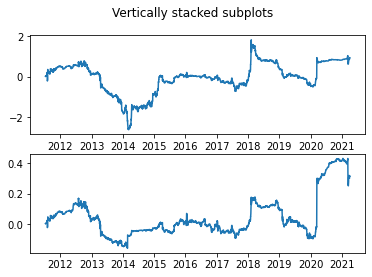

In [235]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(data.beta)
axs[1].plot(data.correlation)

In [237]:
# For fun: alpha

data['alpha'] = data['btc_exret'] - data['beta']*data['snp_exret']
data

,btc_close,btc_ret,snp_close,snp_ret,rf,btc_exret,snp_exret,beta,btc_sigma,snp_sigma,correlation,alpha
caldt,,,,,,,,,,,,
2010-07-19,0.1,0.0000,1071.25,0.0060,0.001,-0.0010,0.0050,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.1,0.0000,1083.48,0.0114,0.001,-0.0010,0.0104,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.1,0.0000,1069.59,-0.0128,0.001,-0.0010,-0.0138,NaN,NaN,NaN,NaN,NaN
2010-07-22,0.1,0.0000,1093.67,0.0225,0.001,-0.0010,0.0215,NaN,NaN,NaN,NaN,NaN
2010-07-23,0.1,0.0000,1102.66,0.0082,0.001,-0.0010,0.0072,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,55036.1,0.0724,3974.54,0.0166,0.000,0.0724,0.0166,0.873247,0.039009,0.013472,0.301586,0.057904
2021-03-29,57616.2,0.0332,3971.09,-0.0009,0.000,0.0332,-0.0009,0.876802,0.039040,0.013426,0.301543,0.033989
2021-03-30,58771.3,0.0200,3958.55,-0.0032,0.000,0.0200,-0.0032,0.946984,0.039010,0.013110,0.318255,0.023030


In [238]:
data.alpha.describe()

count    2447.000000
mean        0.003350
std         0.085796
min        -0.560364
25%        -0.015766
50%         0.000540
75%         0.020721
max         3.368400
Name: alpha, dtype: float64

<AxesSubplot:xlabel='caldt'>

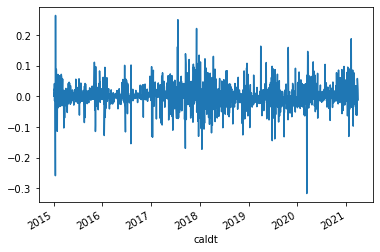

In [241]:
data.alpha[data.index >= '2015-01-01'].plot()

In [243]:
data

,btc_close,btc_ret,snp_close,snp_ret,rf,btc_exret,snp_exret,beta,btc_sigma,snp_sigma,correlation,alpha
caldt,,,,,,,,,,,,
2010-07-19,0.1,0.0000,1071.25,0.0060,0.001,-0.0010,0.0050,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.1,0.0000,1083.48,0.0114,0.001,-0.0010,0.0104,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.1,0.0000,1069.59,-0.0128,0.001,-0.0010,-0.0138,NaN,NaN,NaN,NaN,NaN
2010-07-22,0.1,0.0000,1093.67,0.0225,0.001,-0.0010,0.0215,NaN,NaN,NaN,NaN,NaN
2010-07-23,0.1,0.0000,1102.66,0.0082,0.001,-0.0010,0.0072,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,55036.1,0.0724,3974.54,0.0166,0.000,0.0724,0.0166,0.873247,0.039009,0.013472,0.301586,0.057904
2021-03-29,57616.2,0.0332,3971.09,-0.0009,0.000,0.0332,-0.0009,0.876802,0.039040,0.013426,0.301543,0.033989
2021-03-30,58771.3,0.0200,3958.55,-0.0032,0.000,0.0200,-0.0032,0.946984,0.039010,0.013110,0.318255,0.023030


In [245]:
# Sharpe Ratio -

import numpy as np
def my_rolling_sharpe(y):
    return np.sqrt(252) * (y.mean() / y.std()) # 21 days per month X 12 months = 252

In [276]:
data_SR = data['btc_exret'].rolling(252).apply(my_rolling_sharpe)
data_SR = data_SR.dropna()
data_SR

caldt
2011-07-15    2.817126
2011-07-18    2.837838
2011-07-19    2.861013
2011-07-20    2.851969
2011-07-21    2.847902
                ...   
2021-03-26    3.365477
2021-03-29    3.529560
2021-03-30    3.456374
2021-03-31    3.460646
2021-04-01    3.405180
Name: btc_exret, Length: 2445, dtype: float64

<AxesSubplot:xlabel='caldt'>

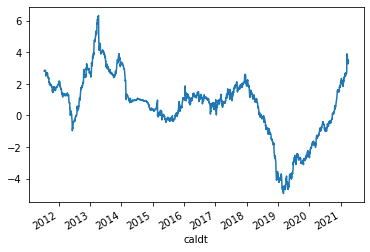

In [277]:
data_SR.plot()

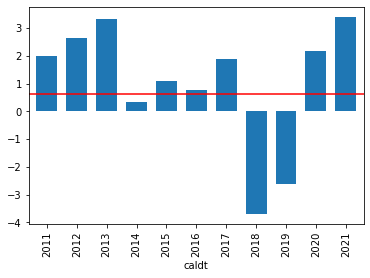

In [283]:
PLOT = data_SR
PLOT = PLOT.resample('Y').apply(lambda ser: ser.iloc[-1,])
PLOT.index = PLOT.index.year
PLOT.plot(kind='bar', width=0.7)
plt.axhline(y=0.618697, color='r', linestyle='-')

In [279]:
data_SR.describe()

count    2445.000000
mean        0.618697
std         2.001389
min        -4.949845
25%        -0.240573
50%         0.948550
75%         1.797699
max         6.339108
Name: btc_exret, dtype: float64

In [286]:
PLOT

caldt
2011    2.007375
2012    2.651971
2013    3.325979
2014    0.351576
2015    1.079929
2016    0.768489
2017    1.868871
2018   -3.714581
2019   -2.607361
2020    2.179899
2021    3.405180
Name: btc_exret, dtype: float64

In [295]:
data.correlation.max()

0.43180986883917244

In [296]:
data[data.correlation == data.correlation.max()]

,btc_close,btc_ret,snp_close,snp_ret,rf,btc_exret,snp_exret,beta,btc_sigma,snp_sigma,correlation,alpha
caldt,,,,,,,,,,,,
2021-01-11,35544.3,-0.0693,3799.61,-0.0066,0.0,-0.0693,-0.0066,0.86171,0.043602,0.021849,0.43181,-0.063613
